### Prof. Pedram Jahangiry

You need to make a copy to your own Google drive if you want to edit the original notebook! Start by opening this notebook on Colab 👇

<a href="https://colab.research.google.com/github/PJalgotrader/Deep_forecasting-USU/blob/main/Lectures%20and%20codes/Module%203-%20Exponential%20Smoothing/Module3-exponential_smoothing_ETS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a> 



![logo](https://upload.wikimedia.org/wikipedia/commons/4/44/Huntsman-Wordmark-with-USU-Blue.gif#center) 


## 🔗 Links

[![linkedin](https://img.shields.io/badge/LinkedIn-0A66C2?style=for-the-badge&logo=linkedin&logoColor=white)](https://www.linkedin.com/in/pedram-jahangiry-cfa-5778015a)

[![Youtube](https://img.shields.io/badge/youtube_channel-1DA1F2?style=for-the-badge&logo=youtube&logoColor=white&color=FF0000)](https://www.youtube.com/channel/UCNDElcuuyX-2pSatVBDpJJQ)

[![Twitter URL](https://img.shields.io/twitter/url/https/twitter.com/PedramJahangiry.svg?style=social&label=Follow%20%40PedramJahangiry)](https://twitter.com/PedramJahangiry)


---


# Module 3: Exponential Smoothing Methods + ETS models 

Exponential smoothing was proposed in the late 1950s (Brown, 1959; Holt, 1957; Winters, 1960), and has motivated some of the most successful forecasting methods. A forecast generated by exponential smoothing uses weighted averages of past observations, with the weights decaying exponentially over time. In other words, the more recent the observation the higher the associated weight.

In this module:

* First, we present the mechanics of the most important exponential smoothing methods
* Then, we present the statistical models that underlie exponential smoothing methods. These models generate identical point forecasts to the methods discussed in the first part of the chapter, but also generate prediction intervals.


Documentation: 

1. **PyCaret**: https://pycaret.readthedocs.io/en/latest/index.html PyCaret3.0
2. **sktime** : https://www.sktime.net/en/stable/users.html

# Installation

Follow the steps here: https://pycaret.gitbook.io/docs/get-started/installation


In [1]:
#only if you want to run it in Google Colab: 
# for this chapter, we can install the light version of PyCaret as below. 

# !pip install pycaret
# if you got a warning that you need to "RESTART RUNTIME", go ahead and press that button. 



In [1]:
# if you got a warning that you need to "RESTART RUNTIME", go ahead and press that button. 

# let's double ckeck the Pycaret version: (if yours is anything higher than 3.0.0, you are good to go)
from pycaret.utils import version
version()

'3.3.2'

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# Importing Dataset

In [3]:
from pycaret.datasets import get_data
airline = get_data('airline')

Period
1949-01    112.0
1949-02    118.0
1949-03    132.0
1949-04    129.0
1949-05    121.0
Freq: M, Name: Number of airline passengers, dtype: float64

In [4]:
# or alternatively, 
df = pd.read_csv("https://raw.githubusercontent.com/PJalgotrader/Deep_forecasting-USU/main/data/airline_passengers.csv", index_col="Month")
df.head()

,Passengers
Month,
1949-01,112
1949-02,118
1949-03,132
1949-04,129
1949-05,121


In [5]:
# if you are working with Pandas, your first job should be changing the type of the index to datetime and then to period! This is a compatibility issue with other packages. 
print(df.index)

Index(['1949-01', '1949-02', '1949-03', '1949-04', '1949-05', '1949-06',
       '1949-07', '1949-08', '1949-09', '1949-10',
       ...
       '1960-03', '1960-04', '1960-05', '1960-06', '1960-07', '1960-08',
       '1960-09', '1960-10', '1960-11', '1960-12'],
      dtype='object', name='Month', length=144)


In [6]:
pd.to_datetime(df.index)

DatetimeIndex(['1949-01-01', '1949-02-01', '1949-03-01', '1949-04-01',
               '1949-05-01', '1949-06-01', '1949-07-01', '1949-08-01',
               '1949-09-01', '1949-10-01',
               ...
               '1960-03-01', '1960-04-01', '1960-05-01', '1960-06-01',
               '1960-07-01', '1960-08-01', '1960-09-01', '1960-10-01',
               '1960-11-01', '1960-12-01'],
              dtype='datetime64[ns]', name='Month', length=144, freq=None)

In [7]:
df.index = pd.to_datetime(df.index).to_period('M')
df.index

PeriodIndex(['1949-01', '1949-02', '1949-03', '1949-04', '1949-05', '1949-06',
             '1949-07', '1949-08', '1949-09', '1949-10',
             ...
             '1960-03', '1960-04', '1960-05', '1960-06', '1960-07', '1960-08',
             '1960-09', '1960-10', '1960-11', '1960-12'],
            dtype='period[M]', name='Month', length=144)

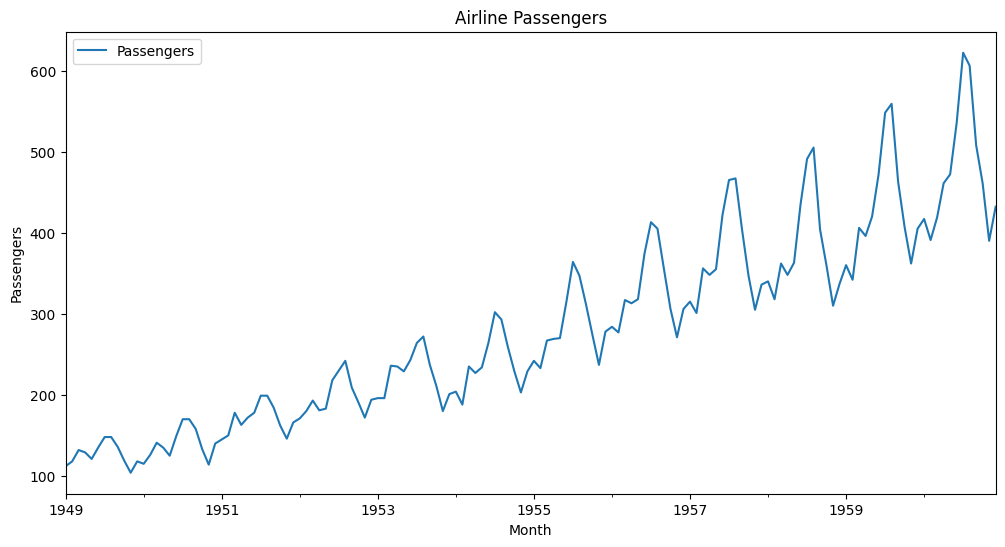

In [8]:
# plotting the air passenger data
df.plot(figsize=(12,6))
#adding months to the x-axis
plt.xlabel('Month')
plt.ylabel('Passengers')
plt.title('Airline Passengers')
plt.show()



Setting up PyCaret Experiment:

In [9]:
from pycaret.time_series import *


In [10]:
exp = TSForecastingExperiment()
exp.setup(data = df, target='Passengers' ,  fh = 12, coverage=0.90)

,Description,Value
0,session_id,1696
1,Target,Passengers
2,Approach,Univariate
3,Exogenous Variables,Not Present
4,Original data shape,"(144, 1)"
5,Transformed data shape,"(144, 1)"
6,Transformed train set shape,"(132, 1)"
7,Transformed test set shape,"(12, 1)"
8,Rows with missing values,0.0%
9,Fold Generator,ExpandingWindowSplitter


In [11]:
exp.check_stats()

,Test,Test Name,Data,Property,Setting,Value
0,Summary,Statistics,Transformed,Length,,144.0
1,Summary,Statistics,Transformed,# Missing Values,,0.0
2,Summary,Statistics,Transformed,Mean,,280.298611
3,Summary,Statistics,Transformed,Median,,265.5
4,Summary,Statistics,Transformed,Standard Deviation,,119.966317
5,Summary,Statistics,Transformed,Variance,,14391.917201
6,Summary,Statistics,Transformed,Kurtosis,,-0.364942
7,Summary,Statistics,Transformed,Skewness,,0.58316
8,Summary,Statistics,Transformed,# Distinct Values,,118.0
9,White Noise,Ljung-Box,Transformed,Test Statictic,"{'alpha': 0.05, 'K': 24}",1606.083817


In [12]:
exp.plot_model(plot='train_test_split')

In [15]:
exp.plot_model(plot='acf', data_kwargs={'nlags':36})

In [16]:
exp.plot_model(plot='pacf', data_kwargs={'nlags':36})

In [17]:
exp.plot_model(plot = 'decomp')


In [18]:
exp.plot_model(plot = 'decomp', data_kwargs = {'type' : 'multiplicative'})


You can check PyCaret forecasting container for extra functionalities: https://github.com/pycaret/pycaret/blob/master/pycaret/time_series/forecasting/functional.py

In [19]:
exp.models()

,Name,Reference,Turbo
ID,,,
naive,Naive Forecaster,sktime.forecasting.naive.NaiveForecaster,True
grand_means,Grand Means Forecaster,sktime.forecasting.naive.NaiveForecaster,True
snaive,Seasonal Naive Forecaster,sktime.forecasting.naive.NaiveForecaster,True
polytrend,Polynomial Trend Forecaster,sktime.forecasting.trend._polynomial_trend_for...,True
arima,ARIMA,sktime.forecasting.arima.ARIMA,True
auto_arima,Auto ARIMA,sktime.forecasting.arima.AutoARIMA,True
exp_smooth,Exponential Smoothing,sktime.forecasting.exp_smoothing.ExponentialSm...,True
ets,ETS,sktime.forecasting.ets.AutoETS,True
theta,Theta Forecaster,sktime.forecasting.theta.ThetaForecaster,True


---
---
## Exponential Smoothing Methods:

---
### SES method

To find the relevant documentation, try https://www.sktime.net/en/stable/api_reference/auto_generated/sktime.forecasting.exp_smoothing.ExponentialSmoothing.html#sktime.forecasting.exp_smoothing.ExponentialSmoothing

and Pycaret model container: https://github.com/pycaret/pycaret/blob/master/pycaret/containers/models/time_series.py

In [20]:
ses = exp.create_model('exp_smooth', trend=None, seasonal=None, sp= None, cross_validation=False )

,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,R2
Test,2.5006,2.9849,76.1426,103.1245,0.1428,0.1616,-0.9198


In [21]:
ses.get_params()

{'damped_trend': False,
 'damping_trend': None,
 'initial_level': None,
 'initial_seasonal': None,
 'initial_trend': None,
 'initialization_method': 'estimated',
 'method': None,
 'minimize_kwargs': None,
 'optimized': True,
 'random_state': None,
 'remove_bias': False,
 'seasonal': None,
 'smoothing_level': None,
 'smoothing_seasonal': None,
 'smoothing_trend': None,
 'sp': None,
 'start_params': None,
 'trend': None,
 'use_boxcox': None,
 'use_brute': True}

---
Let's make some "in sample" predictions:

In [22]:
exp.plot_model(ses, plot='insample', data_kwargs={'labels':["SES"]})

In [23]:
# In-sample Performance metrics?
df.index[:-12] # train set index 

PeriodIndex(['1949-01', '1949-02', '1949-03', '1949-04', '1949-05', '1949-06',
             '1949-07', '1949-08', '1949-09', '1949-10',
             ...
             '1959-03', '1959-04', '1959-05', '1959-06', '1959-07', '1959-08',
             '1959-09', '1959-10', '1959-11', '1959-12'],
            dtype='period[M]', name='Month', length=132)

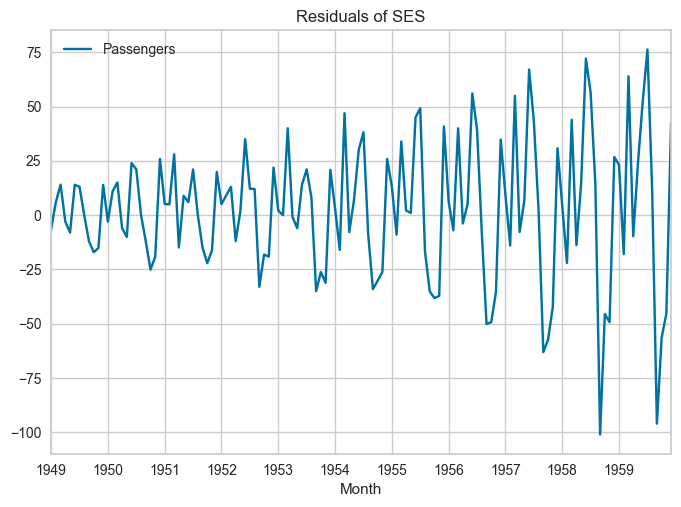

In [24]:
# Plotting residuals for the train set
residuals = ses.predict_residuals(df[:-12])
residuals.plot()
plt.title('Residuals of SES')
plt.show()

Quiz: what's wrong with these residuals in the train set? 

In [25]:
y_pred = ses.predict(df.index[:-12])  # alternatively we could do: y - ses.predict_residuals(y) 
y_pred

,Passengers
Month,
1949-01,118.466667
1949-02,112.032333
1949-03,117.970162
1949-04,131.929851
1949-05,129.014649
...,...
1959-08,547.618697
1959-09,558.943093
1959-10,463.479715


### Timeseries Performance metrics:

| **Metric** | **Formula** | **Pros** | **Cons** | **When to Use** |
|------------|-------------|----------|----------|-----------------|
| **MAE (Mean Absolute Error)** | $\text{MAE} = \frac{1}{n} \sum_{t=1}^{n} \| y_t - \hat{y}_t \|$ | - Easy to interpret<br>- Treats all errors equally | - Does not penalize large errors more than small ones | When you need a simple, direct measure of average error |
| **MAPE (Mean Absolute Percentage Error)** | $\text{MAPE} = \frac{1}{n} \sum_{t=1}^{n} \frac{\| y_t - \hat{y}_t \|}{\| y_t \|}$ | - Intuitive percentage-based error<br>- Easy to understand | - Becomes inflated when actual values are close to zero<br>- Sensitive to outliers | When you want a relative error but avoid it if values are near zero |
| **RMSE (Root Mean Squared Error)** | $\text{RMSE} = \sqrt{\frac{1}{n} \sum_{t=1}^{n} (y_t - \hat{y}_t)^2}$ | - Penalizes larger errors more<br>- Good for sensitive applications | - Sensitive to outliers<br>- Less interpretable than MAE | When large errors are particularly bad (e.g., financial forecasts) |
| **R² (Coefficient of Determination)** | $R^2 = 1 - \frac{\sum_{t=1}^{n}(y_t - \hat{y}_t)^2}{\sum_{t=1}^{n}(y_t - \bar{y})^2}$ | - Shows proportion of variance explained by the model | - Can be misleading if data is non-linear or not stationary | When you want to measure how well the model explains variability in data |


Attention! be aware of the caveats of each metrics. For a full list of available timeseries metrics, **sktime** has a good documentation: https://www.sktime.net/en/stable/api_reference/performance_metrics.html

In [26]:
import numpy as np
from sklearn.metrics import mean_absolute_error, r2_score, mean_absolute_percentage_error, mean_squared_error

def ts_metrics(y, y_hat):
    """
    Calculate and display time series evaluation metrics.
    
    Parameters:
    y (array-like): Actual values
    y_hat (array-like): Predicted values
    
    Returns:
    dict: A dictionary containing all calculated metrics
    """
    # Calculate metrics
    mae = mean_absolute_error(y, y_hat)
    mape = mean_absolute_percentage_error(y, y_hat)
    rmse = np.sqrt(mean_squared_error(y, y_hat))
    r2 = r2_score(y, y_hat)
    
    
    # Store metrics in a dictionary
    metrics = {
        'MAE': mae,
        'MAPE': mape,
        'RMSE': rmse,
        'R2': r2,
    }
    
    # Print metrics with descriptions
    print("Time Series Model Evaluation Metrics:")
    print("-" * 40)
    print(f"Mean Absolute Error (MAE): {mae:.4f}")
    print(f"Mean Absolute Percentage Error (MAPE): {mape:.4%}")
    print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
    print(f"R-squared (R²): {r2:.4f}")
    
    return 

ts_metrics(df['Passengers'][:-12], y_pred)

Time Series Model Evaluation Metrics:
----------------------------------------
Mean Absolute Error (MAE): 23.9830
Mean Absolute Percentage Error (MAPE): 8.9664%
Root Mean Squared Error (RMSE): 31.2636
R-squared (R²): 0.9134


---
Now, let's make some forecasts:

In [27]:
exp.plot_model(ses, plot='forecast',data_kwargs={'labels':["SES"]})

In [28]:
exp.plot_model(ses, plot='forecast', data_kwargs={'fh':36, 'labels':["SES"]})

In [29]:
# again, we can manually construct the forecast values and report performance metrics, but there are some built in functions for this. 
# manually: 
y_forecast = ses.predict(df.index[-12:]) # by default, the predict function, generates the predictions for hold-out set (we set fh=12 during the setup() ). 
y_forecast

,Passengers
1960-01,404.786132
1960-02,404.786132
1960-03,404.786132
1960-04,404.786132
1960-05,404.786132
1960-06,404.786132
1960-07,404.786132
1960-08,404.786132
1960-09,404.786132
1960-10,404.786132


In [30]:
ses.predict()

,Passengers
1960-01,404.786132
1960-02,404.786132
1960-03,404.786132
1960-04,404.786132
1960-05,404.786132
1960-06,404.786132
1960-07,404.786132
1960-08,404.786132
1960-09,404.786132
1960-10,404.786132


In [31]:
ts_metrics(df['Passengers'][-12:], y_forecast)

Time Series Model Evaluation Metrics:
----------------------------------------
Mean Absolute Error (MAE): 76.1426
Mean Absolute Percentage Error (MAPE): 14.2790%
Root Mean Squared Error (RMSE): 103.1245
R-squared (R²): -0.9198


In [32]:
# using built-in function: 
exp.predict_model(ses, fh=12)

,Model,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,R2
0,Exponential Smoothing,2.5006,2.9849,76.1426,103.1245,0.1428,0.1616,-0.9198


,y_pred
1960-01,404.7861
1960-02,404.7861
1960-03,404.7861
1960-04,404.7861
1960-05,404.7861
1960-06,404.7861
1960-07,404.7861
1960-08,404.7861
1960-09,404.7861
1960-10,404.7861


**MASE** and **RMSSE** are the scaled versions of MAE and RMSE. Greater than 1 means the model performs worse than the naive forecast, while a value less than 1 indicates better performance.

 For example, MASE = 2.5 means the model is 2.5 times worse than the naive model, while MASE = 0.5 means the model is performing twice as well as the naive model. 


---
### Holt's linear trend method:

In [33]:
ht = exp.create_model('exp_smooth', trend='add', seasonal=None, cross_validation=False)

,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,R2
Test,2.2069,2.7073,67.2002,93.5338,0.1259,0.1402,-0.5793


In [34]:
exp.plot_model(ht, plot='forecast', data_kwargs={'fh':24, 'labels':['Holts linear trend']})

In [36]:
exp.predict_model(ht, fh=120)

,y_pred
1960-01,406.8585
1960-02,408.9205
1960-03,410.9826
1960-04,413.0446
1960-05,415.1066
...,...
1969-08,643.9919
1969-09,646.0540
1969-10,648.1160
1969-11,650.1780


---
### Holt-Winters method

In [37]:
hw_add = exp.create_model('exp_smooth', trend='add', seasonal='add', sp= 12, cross_validation=False)

,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,R2
Test,0.4394,0.4915,13.3800,16.9796,0.0280,0.0280,0.9480


In [38]:
hw_mult = exp.create_model('exp_smooth', trend='add', seasonal='mul', sp=12, cross_validation=False)

,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,R2
Test,0.3384,0.4576,10.3031,15.8104,0.0221,0.0216,0.9549


In [39]:
hw_damped = exp.create_model('exp_smooth', damped_trend='True' , trend='add', seasonal='mul', sp=12, cross_validation=False)

,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,R2
Test,0.3902,0.4981,11.8810,17.2101,0.0249,0.0243,0.9465


In [40]:
hw_mult.get_params()

{'damped_trend': False,
 'damping_trend': None,
 'initial_level': None,
 'initial_seasonal': None,
 'initial_trend': None,
 'initialization_method': 'estimated',
 'method': None,
 'minimize_kwargs': None,
 'optimized': True,
 'random_state': None,
 'remove_bias': False,
 'seasonal': 'mul',
 'smoothing_level': None,
 'smoothing_seasonal': None,
 'smoothing_trend': None,
 'sp': 12,
 'start_params': None,
 'trend': 'add',
 'use_boxcox': None,
 'use_brute': True}

In [41]:
exp.plot_model([ses,hw_add, hw_mult], plot='insample', data_kwargs={'labels':["SES", "Holt-Winter-additive", "Holt-Winter-Multiplicative"]})

In [42]:
exp.plot_model([ses,ht, hw_add, hw_mult], plot='forecast', data_kwargs={'labels':["SES", "Holt-Linear-trend",  "Holt-Winter-additive", "Holt-Winter-Multiplicative"]})

In [43]:
exp.plot_model([ses,ht, hw_add, hw_mult], plot='forecast', data_kwargs={'fh':36, 'labels':["SES", "Holt-Linear-trend",  "Holt-Winter-additive", "Holt-Winter-Multiplicative"]})

Let's see which one is the best model so far? 

In [45]:
exp.compare_models(include=[ses, ht, hw_add, hw_mult, hw_damped], cross_validation=True)

,Model,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,R2,TT (Sec)
3,Exponential Smoothing,0.5852,0.6105,17.1926,20.1634,0.0435,0.0439,0.8918,0.5267
2,Exponential Smoothing,0.6682,0.6873,19.7277,22.7650,0.0503,0.0502,0.8608,0.5300
4,Exponential Smoothing,0.6942,0.7187,20.3369,23.6887,0.0512,0.0522,0.8481,0.5300
1,Exponential Smoothing,2.0513,2.4695,60.0381,81.4214,0.1363,0.1527,-0.7740,0.5200
0,Exponential Smoothing,2.3599,2.7612,69.0278,91.0322,0.1569,0.1792,-1.2216,0.6433


ExponentialSmoothing(seasonal='mul', sp=12, trend='add')

So, according to the tabe above, the hw_mult is the best performer in the hold out set. Later in the course, we will be comparing the model performance in cross validation sets as it is more reliable. 

In [47]:
exp.plot_model(estimator=hw_mult, plot="diagnostics")

How to read the periodogram: 
A periodogram is used in the context of time series analysis to identify the dominant frequencies in a dataset, which can be indicative of seasonality or recurring cycles. A periodogram of white noise will generally have a flat, uniform appearance, with no clear peaks or patterns.

---
---
## ETS models

In [49]:
exp.models()

,Name,Reference,Turbo
ID,,,
naive,Naive Forecaster,sktime.forecasting.naive.NaiveForecaster,True
grand_means,Grand Means Forecaster,sktime.forecasting.naive.NaiveForecaster,True
snaive,Seasonal Naive Forecaster,sktime.forecasting.naive.NaiveForecaster,True
polytrend,Polynomial Trend Forecaster,sktime.forecasting.trend._polynomial_trend_for...,True
arima,ARIMA,sktime.forecasting.arima.ARIMA,True
auto_arima,Auto ARIMA,sktime.forecasting.arima.AutoARIMA,True
exp_smooth,Exponential Smoothing,sktime.forecasting.exp_smoothing.ExponentialSm...,True
ets,ETS,sktime.forecasting.ets.AutoETS,True
theta,Theta Forecaster,sktime.forecasting.theta.ThetaForecaster,True


In [50]:
ets_ANN = exp.create_model('ets', error="add", trend=None, seasonal=None ,cross_validation=False ) # this is equivalent to point estimate of SES


,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,R2
Test,2.4960,2.9807,76.0029,102.9795,0.1425,0.1612,-0.9144


In [51]:
ets_AAN = exp.create_model('ets', error="add", trend="add", seasonal=None ,cross_validation=False ) # this is equivalent to point estimate of Holt's Linear trend

,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,R2
Test,2.1536,2.6460,65.5779,91.4136,0.1230,0.1364,-0.5085


In [53]:
ets_AAM = exp.create_model('ets', error="add", trend="add", seasonal="mul" ,cross_validation=False )


,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,R2
Test,0.3129,0.4475,9.5284,15.4597,0.0203,0.0199,0.9569


In [54]:
exp.compare_models([ets_ANN, ets_AAN, ets_AAM], cross_validation=False)

,Model,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,R2,TT (Sec)
2,ETS,0.3129,0.4475,9.5284,15.4597,0.0203,0.0199,0.9569,0.0400
1,ETS,2.1536,2.6460,65.5779,91.4136,0.1230,0.1364,-0.5085,0.0100
0,ETS,2.4960,2.9807,76.0029,102.9795,0.1425,0.1612,-0.9144,0.0100


AutoETS(seasonal='mul', sp=12, trend='add')

In [55]:
exp.plot_model(ets_AAM, plot='insample')

In [56]:
exp.plot_model(ets_AAM, plot='forecast')

In [57]:
exp.plot_model(ets_AAM, plot='forecast', data_kwargs={'fh':48})

In [58]:
exp.plot_model([ets_ANN, ets_AAN, ets_AAM], plot='forecast', data_kwargs={'labels':["ETS(A, N, N)", "ETS(A, A, N)", "ETS(A, A, M)"], 'fh':36})

In [59]:
exp.plot_model(estimator=ets_AAM, plot="diagnostics")

In [60]:
ets_AAM.get_params

<bound method BaseObject.get_params of AutoETS(seasonal='mul', sp=12, trend='add')>

In [61]:
ets_AAM.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 ETS Results                                  
==============================================================================
Dep. Variable:                      y   No. Observations:                  132
Model:                       ETS(AAM)   Log Likelihood                -488.626
Date:                Mon, 23 Sep 2024   AIC                           1013.253
Time:                        15:55:37   BIC                           1065.143
Sample:                    01-31-1949   HQIC                          1034.339
                         - 12-31-1959   Scale                           96.116
Covariance Type:               approx                                         
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
smoothing_level         0.3734      0.067      5.551      0.000       0.242       0.505
smoothing_trend      3.734e-05        nan        nan        nan         nan         nan
smoothing_seasonal      0.6266      0.067      9.297      0.000       0.494       0.759
initial_level         109.3498        nan        nan        nan         nan         nan
initial_trend           2.6556        nan        nan        nan         nan         nan
initial_seasonal.0      0.9773        nan        nan        nan         nan         nan
initial_seasonal.1      0.8482        nan        nan        nan         nan         nan
initial_seasonal.2      0.9508        nan        nan        nan         nan         nan
initial_seasonal.3      1.0884        nan        nan        nan         nan         nan
initial_seasonal.4      1.1927        nan        nan        nan         nan         nan
initial_seasonal.5      1.2075        nan        nan        nan         nan         nan
initial_seasonal.6      1.1092        nan        nan        nan         nan         nan
initial_seasonal.7      1.0128        nan        nan        nan         nan         nan
initial_seasonal.8      1.0969        nan        nan        nan         nan         nan
initial_seasonal.9      1.1540        nan        nan        nan         nan         nan
initial_seasonal.10     1.0517        nan        nan        nan         nan         nan
initial_seasonal.11     1.0000        nan        nan        nan         nan         nan
===================================================================================
Ljung-Box (Q):                       41.34   Jarque-Bera (JB):                 1.25
Prob(Q):                              0.02   Prob(JB):                         0.54
Heteroskedasticity (H):               2.21   Skew:                             0.11
Prob(H) (two-sided):                  0.01   Kurtosis:                         3.42
===================================================================================

Warnings:
[1] Covariance matrix calculated using numerical (complex-step) differentiation.
"""

---
## Predict Model

This function predicts Label using a trained model. When data is None, it predicts label on the holdout set.

note: so far, our best model is the ets model


In [62]:
naive = exp.create_model('naive', cross_validation=False)

,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,R2
Test,2.4959,2.9807,76.0000,102.9765,0.1425,0.1612,-0.9143


In [63]:
snaive = exp.create_model('snaive', cross_validation=False)

,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,R2
Test,1.5709,1.4678,47.8333,50.7083,0.0999,0.1057,0.5358


Adding the auto ETS(): 

In [64]:
exp.models()

,Name,Reference,Turbo
ID,,,
naive,Naive Forecaster,sktime.forecasting.naive.NaiveForecaster,True
grand_means,Grand Means Forecaster,sktime.forecasting.naive.NaiveForecaster,True
snaive,Seasonal Naive Forecaster,sktime.forecasting.naive.NaiveForecaster,True
polytrend,Polynomial Trend Forecaster,sktime.forecasting.trend._polynomial_trend_for...,True
arima,ARIMA,sktime.forecasting.arima.ARIMA,True
auto_arima,Auto ARIMA,sktime.forecasting.arima.AutoARIMA,True
exp_smooth,Exponential Smoothing,sktime.forecasting.exp_smoothing.ExponentialSm...,True
ets,ETS,sktime.forecasting.ets.AutoETS,True
theta,Theta Forecaster,sktime.forecasting.theta.ThetaForecaster,True


In [65]:
exp.compare_models(include=[naive, snaive, ses,hw_add, hw_mult,ets_ANN, ets_AAN, ets_AAM, 'ets'], cross_validation=False)

,Model,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,R2,TT (Sec)
7,ETS,0.3129,0.4475,9.5284,15.4597,0.0203,0.0199,0.9569,0.0400
8,ETS,0.3129,0.4475,9.5284,15.4597,0.0203,0.0199,0.9569,0.0400
4,Exponential Smoothing,0.3384,0.4576,10.3031,15.8104,0.0221,0.0216,0.9549,0.0400
3,Exponential Smoothing,0.4394,0.4915,13.3800,16.9796,0.0280,0.0280,0.9480,0.0400
1,Seasonal Naive Forecaster,1.5709,1.4678,47.8333,50.7083,0.0999,0.1057,0.5358,0.0000
6,ETS,2.1536,2.6460,65.5779,91.4136,0.1230,0.1364,-0.5085,0.0100
0,Naive Forecaster,2.4959,2.9807,76.0000,102.9765,0.1425,0.1612,-0.9143,0.0000
5,ETS,2.4960,2.9807,76.0029,102.9795,0.1425,0.1612,-0.9144,0.0100
2,Exponential Smoothing,2.5006,2.9849,76.1426,103.1245,0.1428,0.1616,-0.9198,0.0100


AutoETS(seasonal='mul', sp=12, trend='add')

In [66]:
holdout_pred = exp.predict_model(ets_AAM)
holdout_pred

,Model,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,R2
0,ETS,0.3129,0.4475,9.5284,15.4597,0.0203,0.0199,0.9569


,y_pred
1960-01,417.2259
1960-02,394.0011
1960-03,462.2040
1960-04,448.3355
1960-05,471.6352
1960-06,539.3337
1960-07,623.5589
1960-08,630.7456
1960-09,515.1993
1960-10,449.7402


## Finalize Model

This function trains a given estimator on the entire dataset including the holdout set.

Model finalization is the last step in the experiment. This workflow will eventually lead you to the best model for use in making predictions on new and unseen data. The finalize_model() function fits the model onto the complete dataset including the test/hold-out sample. The purpose of this function is to train the model on the complete dataset before it is deployed in production.

In [67]:
final_model = exp.finalize_model(ets_AAM)

In [68]:
final_model

ForecastingPipeline(steps=[('forecaster',
                            TransformedTargetForecaster(steps=[('model',
                                                                AutoETS(seasonal='mul',
                                                                        sp=12,
                                                                        trend='add'))]))])

---
### Final prediciton on unseen data

The predict_model() function is also used to predict on the unseen dataset.

In [69]:
exp.plot_model(plot='train_test_split')

In [70]:
exp.plot_model(final_model, plot='forecast', data_kwargs={'fh':24})

In [71]:
unseen_predictions = exp.predict_model(final_model, fh=24)
unseen_predictions

,y_pred
1961-01,445.4232
1961-02,418.3926
1961-03,464.7045
1961-04,494.5821
1961-05,505.5186
1961-06,573.3789
1961-07,663.6597
1961-08,654.8078
1961-09,546.7034
1961-10,488.2782


## Save Model

This function saves the transformation pipeline and trained model object into the current working directory as a pickle file for later use.

In [72]:
exp.save_model(final_model, 'best_smoothing_model')

Transformation Pipeline and Model Successfully Saved


(ForecastingPipeline(steps=[('forecaster',
                             TransformedTargetForecaster(steps=[('model',
                                                                 ForecastingPipeline(steps=[('forecaster',
                                                                                             TransformedTargetForecaster(steps=[('model',
                                                                                                                                 AutoETS(seasonal='mul',
                                                                                                                                         sp=12,
                                                                                                                                         trend='add'))]))]))]))]),
 'best_smoothing_model.pkl')

## Load model

This function loads a previously saved pipeline.



In [73]:
my_model = load_model('best_smoothing_model')

Transformation Pipeline and Model Successfully Loaded


In [74]:
my_model

ForecastingPipeline(steps=[('forecaster',
                            TransformedTargetForecaster(steps=[('model',
                                                                ForecastingPipeline(steps=[('forecaster',
                                                                                            TransformedTargetForecaster(steps=[('model',
                                                                                                                                AutoETS(seasonal='mul',
                                                                                                                                        sp=12,
                                                                                                                                        trend='add'))]))]))]))])

# Done!